In [1]:
# Cell 1 Uses some simple logic to summarise the task data.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

df = pd.read_csv("tasks.csv")

# convert created_at to datetime
if "created_at" in df.columns:
    df["created_at"] = pd.to_datetime(df["created_at"])

#summary stats
total_tasks = len(df)
completed_tasks = df["completed"].sum()
incompleted_tasks = total_tasks - completed_tasks

print(f"Total tasks: {total_tasks}")
print(f"Completed tasks: {completed_tasks}")
print(f"Incomplete: {incompleted_tasks}")

Total tasks: 5
Completed tasks: 3
Incomplete: 2


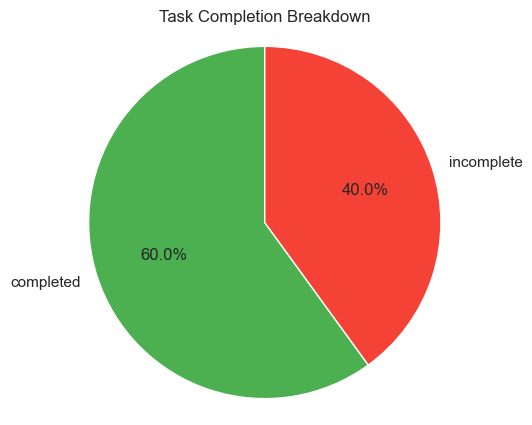

In [2]:
# Cell 2 Creates a pie chart using matplotlib library.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("tasks.csv")

#summary stats
total_tasks = len(df)
completed_tasks = df["completed"].sum()
incompleted_tasks = total_tasks - completed_tasks

labels = ["completed", "incomplete"]
sizes = [completed_tasks, incompleted_tasks]
color = ["#4CAF50", "#F44336"] # Standard red and green colours. 

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, colors=color) # set up pie chart.
plt.title("Task Completion Breakdown")
plt.axis("equal")
plt.show()

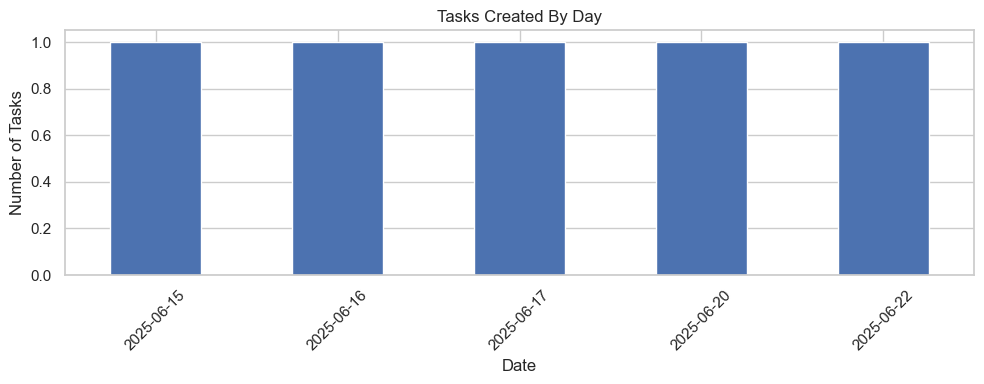

In [6]:
# Cell 3 Creates a histrogram to show tasks over time.
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("tasks.csv")

# convert created_at to datetime
if "created_at" in df.columns:
    df["created_at"] = pd.to_datetime(df["created_at"])

if "created_at" in df.columns:
    df["date"] = df["created_at"].dt.date
    daily_counts = df.groupby("date").size()

    plt.figure(figsize=(10,4))
    daily_counts.plot(kind="bar")
    plt.title("Tasks Created By Day")
    plt.xlabel("Date")
    plt.ylabel("Number of Tasks")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show

In [1]:
import pandas as pd

# Load existing data
df = pd.read_csv("tasks.csv")

# add new columns 
new_columns = {
    "priority": 3,
    "category": "General",
    "due_date": pd.NaT,
    "completed_at": pd.NaT
}

for col, default in new_columns.items():
    if col not in df.columns:
        df[col] = default

# Save updated CSV
df.to_csv("tasks.csv", index=False)

df.head()

,id,name,completed,created_at,priority,category,due_date,completed_at
0,1,Gym,True,2025-06-15 12:01:39.139134,3,General,NaT,NaT
1,2,Homework,True,2025-06-16 12:02:50.046078,3,General,NaT,NaT
2,3,Cleaning,True,2025-06-17 12:02:57.171784,3,General,NaT,NaT
3,4,Placement Work,False,2025-06-20 12:03:03.370962,3,General,NaT,NaT
4,5,Dog Walk,False,2025-06-22 12:03:14.360988,3,General,NaT,NaT


In [2]:
import pandas as pd

# Checking new add method works.
df = pd.read_csv("tasks.csv", parse_dates=["created_at", "due_date", "completed_at"])
df.head(10)

,id,name,completed,created_at,priority,category,due_date,completed_at
0,1,Gym,True,2025-06-15 12:01:39.139134,3,General,NaT,NaT
1,2,Homework,True,2025-06-16 12:02:50.046078,3,General,NaT,NaT
2,3,Cleaning,True,2025-06-17 12:02:57.171784,3,General,NaT,2025-06-22 17:42:15.765325
3,4,Placement Work,False,2025-06-20 12:03:03.370962,3,General,NaT,NaT
4,5,Dog Walk,True,2025-06-22 12:03:14.360988,3,General,NaT,2025-06-22 17:44:16.313497
5,6,Cook,True,2025-06-22 17:19:33.391850,3,General,2025-07-22,2025-06-22 17:42:44.219752
6,7,Clean,True,2025-06-22 17:26:32.880328,3,Personal,2025-07-13,NaT


In [5]:
#Summary Function 
def task_summary(df):
    print("***Task Summary: ***\n")

    #total tasks
    print(f"Total tasks: {len(df)}")

    #completed vs need completion
    completed = df["completed"].sum()
    print(f"Completed: {completed}")
    print(f"Not Completed: {len(df) - completed}\n")

    #by category
    print("Tasks by Category")
    for category, count in df["category"].value_counts().items():
        print(f" - {category}: {count}")
    print()
    
    #by priority
    print("Tasks by Priority: ")
    for priority, count in df["priority"].value_counts().sort_index().items():
        print(f" - Priority Level {priority}: {count}")

df = pd.read_csv("tasks.csv", parse_dates=["created_at", "due_date", "completed_at"])
task_summary(df)

***Task Summary: ***

Total tasks: 50
Completed: 22
Not Completed: 28

Tasks by Category
 - Personal: 16
 - Work: 11
 - Home Tasks: 9
 - University: 8
 - Fitness: 6

Tasks by Priority: 
 - Priority Level 1: 12
 - Priority Level 2: 7
 - Priority Level 3: 9
 - Priority Level 4: 11
 - Priority Level 5: 11


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [8]:
def plot_tasks_by_category(df):
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x='category', order=df['category'].value_counts().index)
    plt.title("Number of tasks by Category")
    plt.xlabel("Category")
    plt.ylabel("Number of Tasks")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

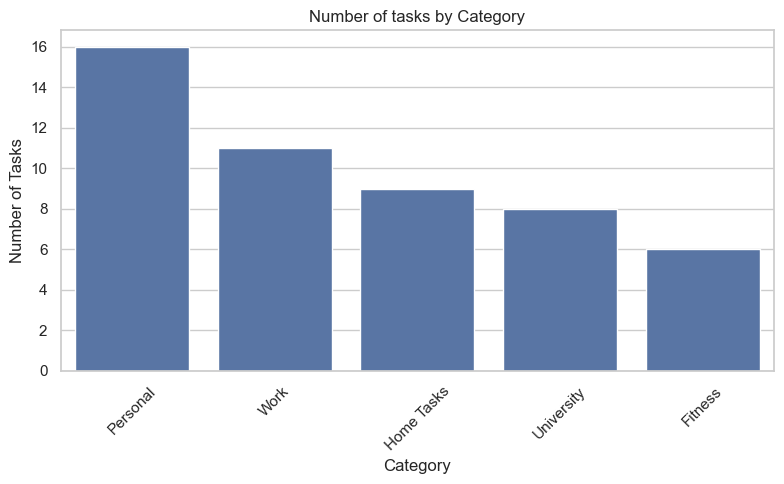

In [9]:
plot_tasks_by_category(df)